In [1]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

# Utils

Check [Numpy masked array](https://numpy.org/doc/stable/reference/maskedarray.generic.html)

In [2]:
def read_data(file_prefix, num_data):    
    max_len = 0
    accu_list, loss_list, time_list = [], [], []
    
    # Round number starts from 1 (Rename your CSV files)
    for round_number in range(1, num_data+1):
        f = f'{file_prefix}-{round_number}.csv'
        print(f)
        df = pd.read_csv(f, header=None)
        
        # Append data
        accu_list.append(df[1])
        loss_list.append(df[2])
        time_list.append(df[3])
        
        # Check max length
        if df.shape[0] > max_len:
            max_len = df.shape[0]
    
    return max_len, accu_list, loss_list, time_list


def mask_array(num_data, max_len, data_list):
    """Convert data list to numpy masked array"""
    array_masked = np.ma.empty((num_data, max_len))
    array_masked.mask = True
    
    for i in range(num_data):
        array_masked[i, :data_list[i].shape[0]] = np.array(data_list[i])
        
    return array_masked


def calc_average(num_data, max_len, data_list):
    """
    Get average of arrays of unequal length.
    """

    # Mask the data
    data_masked = mask_array(num_data, max_len, data_list)
    
    # Calculate averages
    data_avg = data_masked.mean(axis=0) 
           
    return data_avg

# Pipeline

In [3]:
def pipe(file_prefix, num_data):
    max_len, accu_list, loss_list, time_list = read_data(file_prefix, num_data)
    accu_avg = calc_average(num_data, max_len, accu_list)
    loss_avg = calc_average(num_data, max_len, loss_list)
    time_avg = calc_average(num_data, max_len, time_list)
    return accu_avg, loss_avg, time_avg

# Parameters
- MNIST
- 1, 2, or 3 edge servers
- 100 workers
- Learning Rate = 0.001
- Batch Size = 100
- Edge Server range = 50
- Simple mean aggregation
- Number of gradients to accumulate before cloud and edge aggregations = 10
- No byzantine attacks

# VM Spec (GCP)

Zone: us-east1-b

Image: ubuntu-1804-bionic-v20210623

1. Simulator (1 VM)
    - e2-standard-2 (2 vCPUs, 8 GB memory)

2. Cloud Server (1 VM)
    - e2-standard-2 (2 vCPUs, 8 GB memory)

3. Edge Servers (1 VM)
    - e2-standard-8 (8 vCPUs, 32 GB memory)

4. Workers (2 VMs - 50 workers on each VM)
    - e2-highcpu-32 (32 vCPUs, 32 GB memory)

# 1 Edge Server

In [4]:
file_prefix = "rsu1-mean-no_byz"
num_data = 5

edge1_acc_avg, edge1_loss_avg, edge1_time_avg = pipe(file_prefix, num_data)

rsu1-mean-no_byz-1.csv
rsu1-mean-no_byz-2.csv
rsu1-mean-no_byz-3.csv
rsu1-mean-no_byz-4.csv
rsu1-mean-no_byz-5.csv


# 2 Edge Servers

In [5]:
file_prefix = "rsu2-mean-no_byz"
num_data = 5

edge2_acc_avg, edge2_loss_avg, edge2_time_avg = pipe(file_prefix, num_data)

rsu2-mean-no_byz-1.csv
rsu2-mean-no_byz-2.csv
rsu2-mean-no_byz-3.csv
rsu2-mean-no_byz-4.csv
rsu2-mean-no_byz-5.csv


# 3 Edge Servers

In [6]:
file_prefix = "rsu3-mean-no_byz"
num_data = 5

edge3_acc_avg, edge3_loss_avg, edge3_time_avg = pipe(file_prefix, num_data)

rsu3-mean-no_byz-1.csv
rsu3-mean-no_byz-2.csv
rsu3-mean-no_byz-3.csv
rsu3-mean-no_byz-4.csv
rsu3-mean-no_byz-5.csv


# PLOT

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


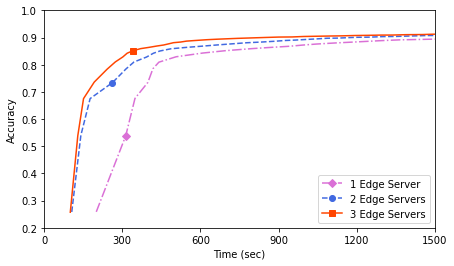

In [7]:
plt.figure(figsize=(7, 4))

plt.plot(edge1_time_avg, edge1_acc_avg, linestyle='-.', c='orchid')
plt.plot(edge1_time_avg[1], edge1_acc_avg[1], '-.D', label="1 Edge Server", c='orchid')

plt.plot(edge2_time_avg, edge2_acc_avg, linestyle='--', c='royalblue')
plt.plot(edge2_time_avg[3], edge2_acc_avg[3], '--o', label="2 Edge Servers", c='royalblue')

plt.plot(edge3_time_avg, edge3_acc_avg, linestyle='-', c='orangered')
plt.plot(edge3_time_avg[8], edge3_acc_avg[8], '-s', label="3 Edge Servers", c='orangered')

X_LIM = 1500
plt.xlim(0, X_LIM)
plt.ylim(bottom=0.2, top=1)
plt.xticks(np.arange(0, X_LIM+100, 300))
plt.yticks(np.arange(0.2, 1.1, 0.1))
plt.legend(loc=4)
plt.xlabel('Time (sec)')
plt.ylabel("Accuracy")
plt.savefig("edge_effect.eps", format='eps')
plt.show()